# Linear Regression using Gradient Descent

## Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

Get the x and y vectors from the sklearn dataset 'make_regression'. We choose number of samples as 100 and number of features as 1. Also some noise is added so that it is easier to visualize.

In [2]:
x, y = make_regression(n_features=1, n_samples=100, noise=8)
y = y.reshape(-1,1)

Now, a scatter plot is plotted of x and y.

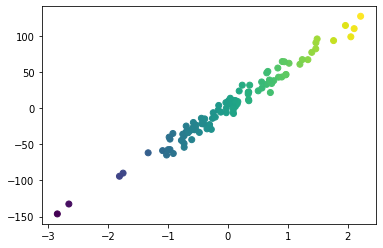

In [3]:
plt.scatter(x, y, c=x)

## The Linear Regression Class

In [4]:
class LinearRegression:
    
    def __init__(self, a=0.01):
        self.alpha = a
    
    alpha = 0
    err = []
    
    def online_gradient_descent(self, x, y, itr):
        '''
            This method updates the values of b0 and b1 after seeing each point.
            The initial values of b0 and b1 are considered to be 0. 
            Now for the passed number of iterations, the following steps are repeated:
                1. First calculate predicted values using the previous values
                2. Calculate mean squared error.
                3. update the values of b0 and b1 using the learning rate.
            Now plot the errors.
        '''
        b0 = 0.0
        b1 = 0.0
        for j in range(itr):
            pred = [0 for i in x]
            error = [0 for i in x]
            for i in range(len(x)):
                pred[i] = b0 + b1*x[i]
                error[i] = pred[i] - y[i]
                b0 = b0 - self.alpha * error[i]
                b1 = b1 - self.alpha * error[i] * x[i]
                #print(b0, b1)
            mean_err = np.array(error).mean()
            self.err.append(np.square(mean_err))
        
        pred = [(b0+b1*i) for i in x]
        plt.plot(x, pred, c='b')
        plt.scatter(x, y, c=y)
    
    def offline_gradient_descent(self, x, y, itr):
        '''
            In this method we update the values of m and c after each iteration, i.e.
            after seeing all the points.
        '''
        m = 0 # m is the slope of the regression line
        c = 0 # c is the intercept
        err1 = [] # err holds the total mean squared error of each iteration
        n = len(x) # n is the total number of sample points
        for i in range(itr):
            y_pred = m*x+c # calculated value of y
            d_m = (-2/n)*np.sum(x*(y-y_pred)) # derivative with respect to slope
            d_c = (-2/n)*np.sum(y-y_pred) # derivative with respect to intercept
            m = m - self.alpha * d_m # updating the slope
            c = c - self.alpha * d_c # updating the intercept
            errors = np.square(np.subtract(y,y_pred))
            err1.append(errors.mean())
        plt.plot(err1) # plotting the mean squared error
        plt.show()
        predictions = m*x+c
        plt.scatter(x,y,c=y)
        plt.plot(x,predictions, c='r')
        plt.show()

### Plotting the 

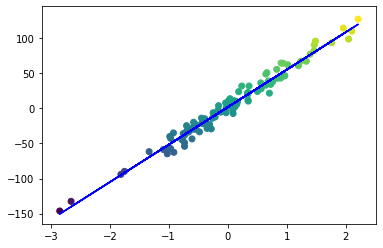

In [5]:
lr = LinearRegression()
lr.online_gradient_descent(x,y,50)

In [6]:
arr = np.array(lr.err)
arr = arr.flatten()
#plt.plot(arr)

### Plot of:
### 1. MSE(Mean squared error) per epoch (iteration)
### 2. Scatter plot of the x and y values
### 3. The linear line that fits the data points

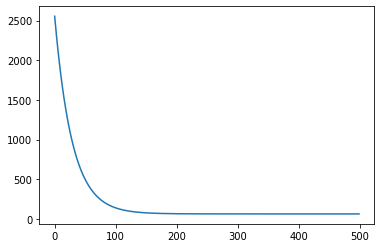

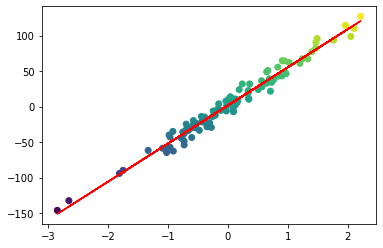

In [7]:
lr1 = LinearRegression(0.01)
lr1.offline_gradient_descent(x,y,500)